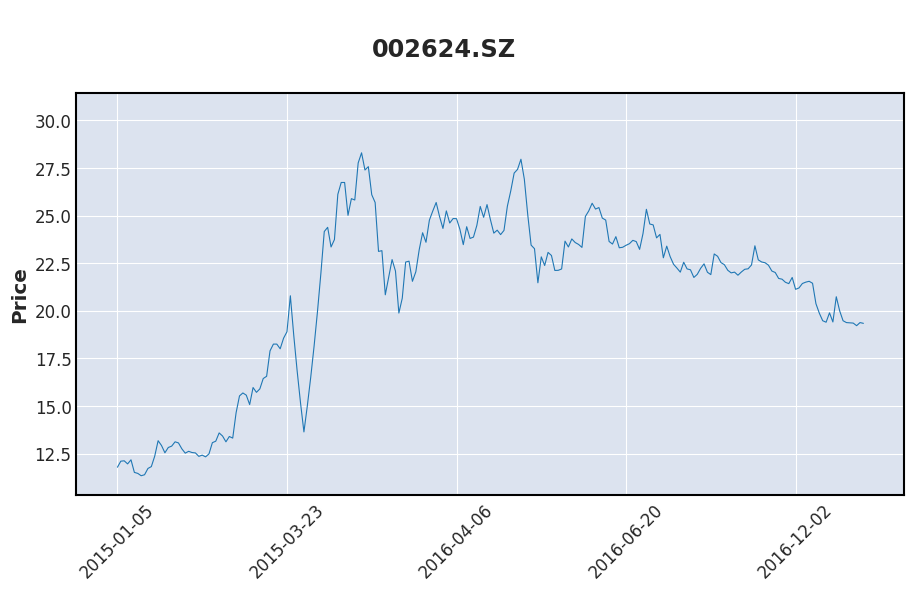

In [1]:
#https://github.com/matplotlib/mplfinance/blob/master/examples/addplot.ipynb
from xlib.astock import AStock
import talib as ta
import numpy as np 
import pandas as pd
import mplfinance as mpf
ts_code='002624.sz'
data=AStock.getStockDailyPriceByCode(ts_code,'tushare')
data=data[data['trade_date']>'20150101']
data=data[data['trade_date']<'20170101']
data['trade_date'] = pd.to_datetime(data['trade_date'], format='%Y%m%d')
data=data.set_index('trade_date')   
mpf.plot(data, 
         type='line',
         datetime_format='%Y-%m-%d',
         figratio=(20,10), 
         title=f"\n002624.SZ", 
)


In [2]:
data['idx']=range(0,len(data))

In [3]:
min=data['close'].min()
minidx=data['close'].idxmin()

max=data['close'].max()
maxidx=data['close'].idxmax()
print(min)
print(data.loc[minidx]['idx'])
print(max)
print(data.loc[maxidx]['idx'])

11.3427807826917
7
28.298180082723515
72


In [4]:
# x=7,y=11.34
# x=1074,y=42.57

In [5]:
#两点式方程
# y-y1/y2-y1=(x-x1)/(x2-x1)
# y-y1=(x-x1)/(x2-x1)*(y2-y1)
# y=(x-x1)/(x2-x1)*(y2-y1)+y1

y1=data['close'].min()
x1=data.loc[data['close'].idxmin()]['idx']

y2=data['close'].max()
x2=data.loc[data['close'].idxmax()]['idx']

data['gann_1']=((data['idx']-x1)/(x2-x1))*(y2-y1)+y1

print(data['gann_1'])

trade_date
2015-01-05     9.516815
2015-01-06     9.777667
2015-01-07    10.038519
2015-01-08    10.299372
2015-01-09    10.560224
                ...    
2016-12-26    65.860911
2016-12-27    66.121763
2016-12-28    66.382615
2016-12-29    66.643468
2016-12-30    66.904320
Name: gann_1, Length: 221, dtype: float64


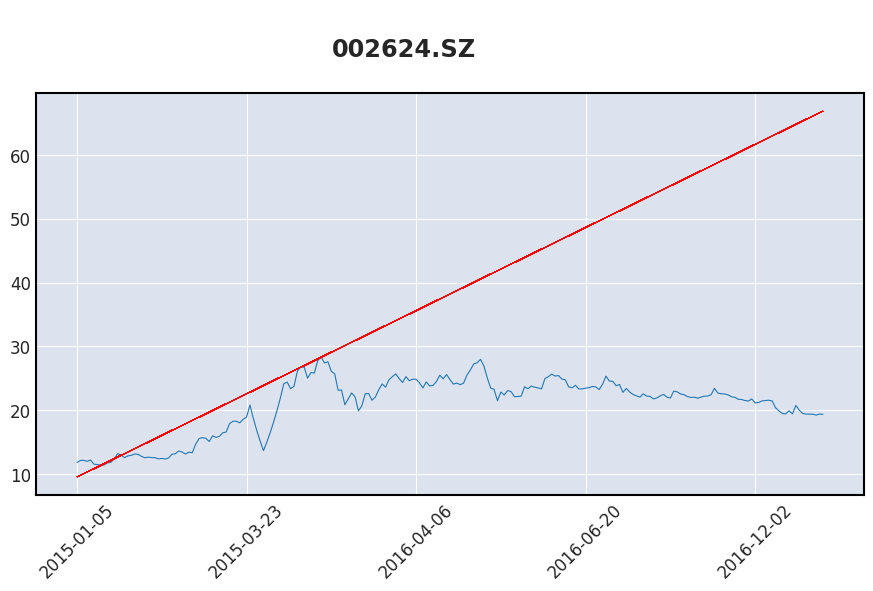

In [6]:
gann_lines=[
   tuple(zip(data.index, data.gann_1))
]
    
mpf.plot(data, 
         type='line',
         datetime_format='%Y-%m-%d',
         figratio=(20,10), 
         title=f"\n002624.SZ", 
         alines=dict(alines=gann_lines,colors=['r'],linewidths=0.5),
         ylabel='', 
         ylabel_lower=''
        )

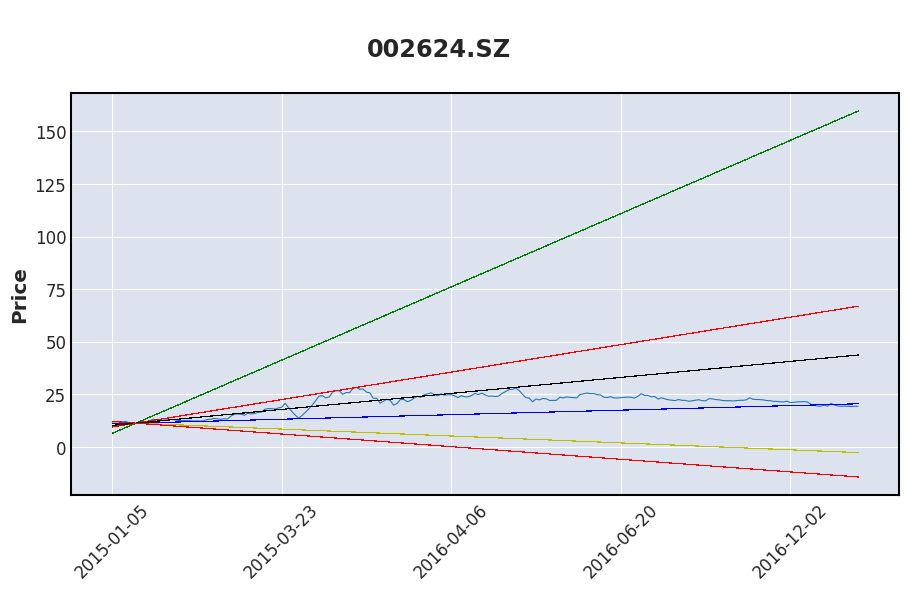

In [7]:
data['gann_0_5']=((data['idx']-x1)/(x2-x1))*(0.5*y2-y1)+y1
data['gann_0_25']=((data['idx']-x1)/(x2-x1))*(0.75*y2-y1)+y1
data['gann_0_75']=((data['idx']-x1)/(x2-x1))*(0.25*y2-y1)+y1
data['gann_0_125']=((data['idx']-x1)/(x2-x1))*(0.125*y2-y1)+y1
data['gann_2']=((data['idx']-x1)/(x2-x1))*(2*y2-y1)+y1
data['gann_4']=((data['idx']-x1)/(x2-x1))*(4*y2-y1)+y1
data['gann_8']=((data['idx']-x1)/(x2-x1))*(8*y2-y1)+y1
gann_lines=[
    tuple(zip(data.index, data.gann_1)),
    tuple(zip(data.index, data.gann_2)),
    tuple(zip(data.index, data.gann_0_5)),
    tuple(zip(data.index, data.gann_0_75)),
    tuple(zip(data.index, data.gann_0_25)),
    tuple(zip(data.index, data.gann_0_125)),
#    tuple(zip(data.index, data.gann_4)),
#    tuple(zip(data.index, data.gann_8)),
]


    
mpf.plot(data, 
         type='line',
         datetime_format='%Y-%m-%d',
         figratio=(80,40), 
         title=f"\n002624.SZ", 
         alines=dict(alines=gann_lines,colors=['r','g','b','y','k'],linewidths=0.1),
        )

In [8]:
import numpy as np
y3=data['close'].max()
x3=data.loc[data['close'].idxmax()]['idx']

y4=data.loc[data['close'].idxmax():]['close'].min()
x4=data.loc[data.loc[data['close'].idxmax():]['close'].idxmin()]['idx']

print(x3)
print(x4)

data['gann2_1']=((data['idx']-x3)/(x4-x3))*(y4-y3)+y3
data['gann2_1']=data.apply(lambda x:np.nan if x['idx']<x3 else x['gann2_1'],axis=1)

data['gann2_0_5']=((data['idx']-x3)/(0.5*(x4-x3)))*(y4-y3)+y3
data['gann2_0_5']=data.apply(lambda x:np.nan if x['idx']<x3 or x['gann2_0_5']<0  else x['gann2_0_5'],axis=1)

data['gann2_1_25']=((data['idx']-x3)/(1.25*(x4-x3)))*(y4-y3)+y3
data['gann2_1_25']=data.apply(lambda x:np.nan if x['idx']<x3 or x['gann2_1_25']<0  else x['gann2_1_25'],axis=1)

data['gann2_0_25']=((data['idx']-x3)/(0.25*(x4-x3)))*(y4-y3)+y3
data['gann2_0_25']=data.apply(lambda x:np.nan if x['idx']<x3 or x['gann2_0_25']<0  else x['gann2_0_25'],axis=1)

data['gann2_0_125']=((data['idx']-x3)/(0.125*(x4-x3)))*(y4-y3)+y3
data['gann2_0_125']=data.apply(lambda x:np.nan if x['idx']<x3 or x['gann2_0_125']<0  else x['gann2_0_125'],axis=1)

data['gann2_0_75']=((data['idx']-x3)/(0.75*(x4-x3)))*(y4-y3)+y3
data['gann2_0_75']=data.apply(lambda x:np.nan if x['idx']<x3 or x['gann2_0_75']<0  else x['gann2_0_75'],axis=1)

print(data['gann2_1'])

72
218
trade_date
2015-01-05          NaN
2015-01-06          NaN
2015-01-07          NaN
2015-01-08          NaN
2015-01-09          NaN
                ...    
2016-12-26    19.345972
2016-12-27    19.283803
2016-12-28    19.221635
2016-12-29    19.159467
2016-12-30    19.097299
Name: gann2_1, Length: 221, dtype: float64


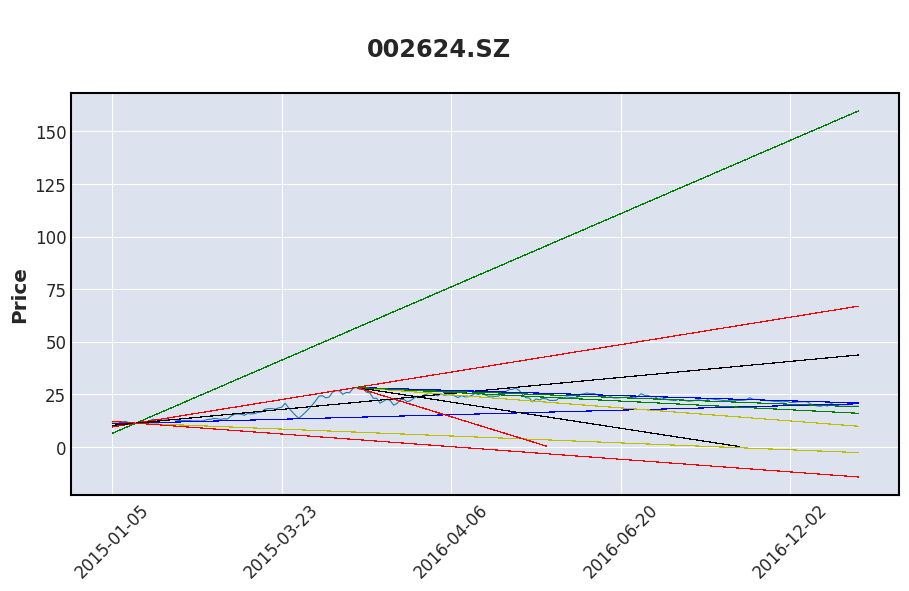

In [9]:

gann_lines=[
    tuple(zip(data.index, data.gann_1)),
    tuple(zip(data.index, data.gann_2)),
    tuple(zip(data.index, data.gann_0_5)),
    tuple(zip(data.index, data.gann_0_75)),
    tuple(zip(data.index, data.gann_0_25)),
    tuple(zip(data.index, data.gann_0_125)),
    tuple(zip(data.index, data.gann2_1)), 
    tuple(zip(data.index, data.gann2_1_25)), 
    tuple(zip(data.index, data.gann2_0_5)), 
    tuple(zip(data.index, data.gann2_0_25)), 
    tuple(zip(data.index, data.gann2_0_125)), 
    tuple(zip(data.index, data.gann2_0_75)), 
]


    
mpf.plot(data, 
         type='line',
         datetime_format='%Y-%m-%d',
         figratio=(80,40), 
         title=f"\n002624.SZ", 
         alines=dict(alines=gann_lines,colors=['r','g','b','y','k'],linewidths=0.1),
        )